## Week 2 : Linear Regression
```
- Machine Learning, Innopolis University (Fall semester 2024)
- Instructors: Adil Khan & Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. Linear Regression
2. Multiple Linear Regression
3. Polynomial Regression
3.1 Overfitting & underfitting
```

<hr>

<img src="https://www.alpharithms.com/wp-content/uploads/1156/slope-intercept-vs-linear-regression-equations.jpg"/>



## Typical ML model Training Procedure

1. Define the Task (Supervised or unsupervised Learning, Classification or Regression)  
1. Import necessary libraries
1. Load and Explore the dataset (visualization) 
1. Preprocess the Data & split to train/test  (feature selection, scaling, normalization, etc..)
1. Build, Train and Test Model
1. Evaluate model using appropiate evaluation metrics (MSE, $R^2$, accuracy, f-score, precision, recall, etc.. )

## 1. Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
<br>
<br>
<center><b>Simple Linear Regression</b></center>
$$y = \beta_0 + \beta_1x_1 $$

### 1.2 Import necessary libraries

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 1.3 Load from database and Explore the dataset

In [13]:
# !pip install SQLAlchemy
# !pip install Flask-SQLAlchemy
# from flask_sqlalchemy import SQLAlchemy
# import sqlalchemy
from sqlalchemy import create_engine, text

session_engine = create_engine('sqlite:///ml-regression.db')

with session_engine.connect() as conn: 
    student_scores_df = pd.read_sql_query(text('SELECT * FROM student_scores'), conn) 

student_scores_df.drop(columns=['index'], inplace=True)
student_scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 1.3.1 Data profile and Statistics 

<span style="color:red">Task : Get data profile and save it as `.html`</span>

In [1]:
from ydata_profiling import ProfileReport

# TODO: Task
report = ProfileReport(student_scores_df)
report.to_file('data_profile_report.html')

student_scores_df.describe()

NameError: name 'student_scores_df' is not defined

### 1.3.1 Visualization

Plot the data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data points. Usually Matplotlib is used but some other libraries exist i.e [Plotly](https://github.com/plotly/plotly.py), [Seaborn](https://seaborn.pydata.org/),[Geoplotlib](https://github.com/andrea-cuttone/geoplotlib/wiki/User-Guide), [Gleam](https://github.com/dgrtwo/gleam), [ggplot](https://github.com/tidyverse/ggplot2)

**Remember :** Plot should have a title, axis labels, and legend for easy interpretation

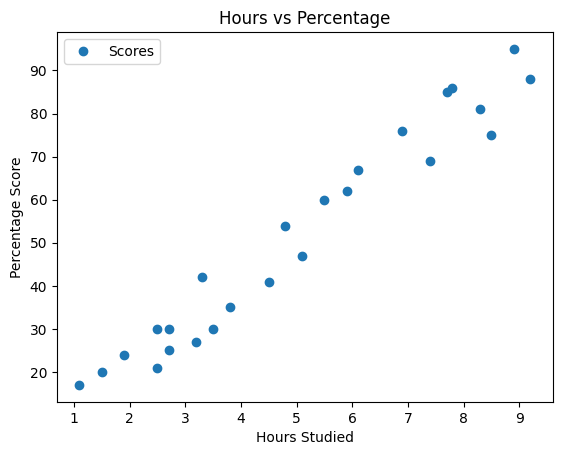

In [16]:
student_scores_df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### 1.4 Preprocess the Data & split to train set and test set

<span style="color:red">Task : split the data into train (80%) and test (20%)</span>

In [17]:
X = student_scores_df.iloc[:, :-1].values
y = student_scores_df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


### 1.5 Build, Train and Test ModelLinear Regression Model

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficient : {regressor.coef_}")

y_pred = regressor.predict(X_test)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

Model intercept : 1.5493400016397416
Model coefficient : [10.07706813]


In [19]:
eval_df

,Actual,Predicted
0,47,52.942387
1,60,56.973215
2,76,71.081110
3,81,85.189005
4,75,87.204419


### 1.5 Evaluate model using appropiate evaluation metrics

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.056297450192676
Mean Squared Error: 47.03289775940556
Root Mean Squared Error: 6.858053496394262


## 2. Multiple Linear Regression

Linear regression involving multiple variables is called "multiple linear regression"
We will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.
We seek a model of the form:

$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n.$$

### 2.3  Load and Explore the dataset

In [21]:
with session_engine.connect() as conn:
    petrol_consumption_df = pd.read_sql_query(text('SELECT * FROM petrol_consumption'), conn)

petrol_consumption_df.drop('index', axis=1, inplace=True)
petrol_consumption_df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [24]:
petrol_consumption_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


### 2.4 Preprocess the Data & split to train set and test set

In [25]:
X = petrol_consumption_df.drop('Petrol_Consumption', axis=1)
y = petrol_consumption_df['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2.5 Build, Train and Test Model Regression Model

In [ ]:
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)
# print(f"Model intercept : {regressor.intercept_}")
# print(f"Model coefficients : {regressor.coef_}")

Model intercept : 425.59933220324206
Model coefficients : [-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]


### 2.6 Evaluate model using appropiate evaluation metrics

<span style="color:red">Task 1 : Use the predict function in the model(`regressor`) to predict the output of the testset(`X_test`) and  print it. </span>

<span style="color:red">Task  2 : Measure the performance of the model using: <br>     </span>
1. root mean squared error 
1. mean absolute error 
1. coefficient of determination $R^2$. See [`sklearn.metrics.r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) for $R^2$.

In [29]:
# TODO: Task 1
y_pred = regressor.predict(X_test)

evaluation_df = pd.DataFrame({'Actual y': y_test, 'Predicted y': y_pred})

evaluation_df

,Actual y,Predicted y
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [34]:
# TODO: Task 2
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Coefficient of determination: ", metrics.r2_score(y_test, y_pred))

Root Mean Squared Error:  68.31064915215173
Mean Absolute Error:  56.82224747896472
Coefficient of determination:  0.20361932410121653


## 3. Polynomial Regression, Underfitting & Overfitting

Polynomial Regression, is simply a transformation for the explanatory variables to higher polynomial orders with interactive variables.

1. Why do we need it?
1. Which order of the polynomial should we choose? 
2. should we always pick the most complex model? 



### 3.2 Import libraries

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #to convert the original features into their higher order terms 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [36]:
# help(PolynomialFeatures)

Help on class PolynomialFeatures in module sklearn.preprocessing._polynomial:

class PolynomialFeatures(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Read more in the :ref:`User Guide <polynomial_features>`.
 |  
 |  Parameters
 |  ----------
 |  degree : int or tuple (min_degree, max_degree), default=2
 |      If a single int is given, it specifies the maximal degree of the
 |      polynomial features. If a tuple `(min_degree, max_degree)` is passed,
 |      then `min_degree` is the minimum and `max_degree` is the maximum
 |

### 3.3 Load and Explore the dataset
<span style="color:red">Task : generate synthetic dataset by adding some random gaussian noise to a cosine function.</span>

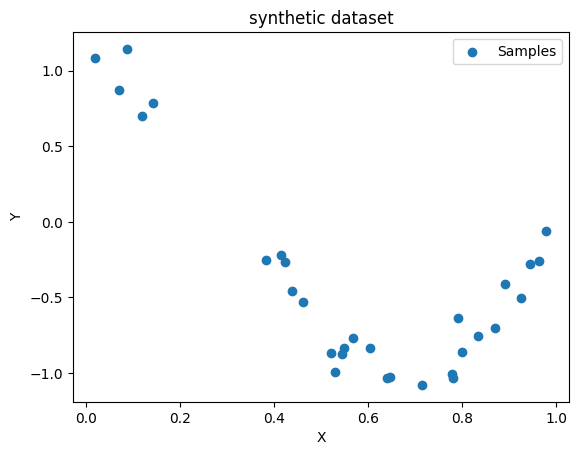

In [39]:
#  function
def fn(X):
    # Task : one line of code
    return np.cos(X * 1.5 * np.pi)

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = fn(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X,y,label="Samples")
plt.title('synthetic dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc="best")
plt.show()

### 3.4 Preprocess the Data, build model and evaluate model 

* We will build three polynomial models with degrees [1, 4, 15] and observe the effect of increasing the degree of complixity of the model on how well it suits the data.
* We will evaluate our model using cross validation

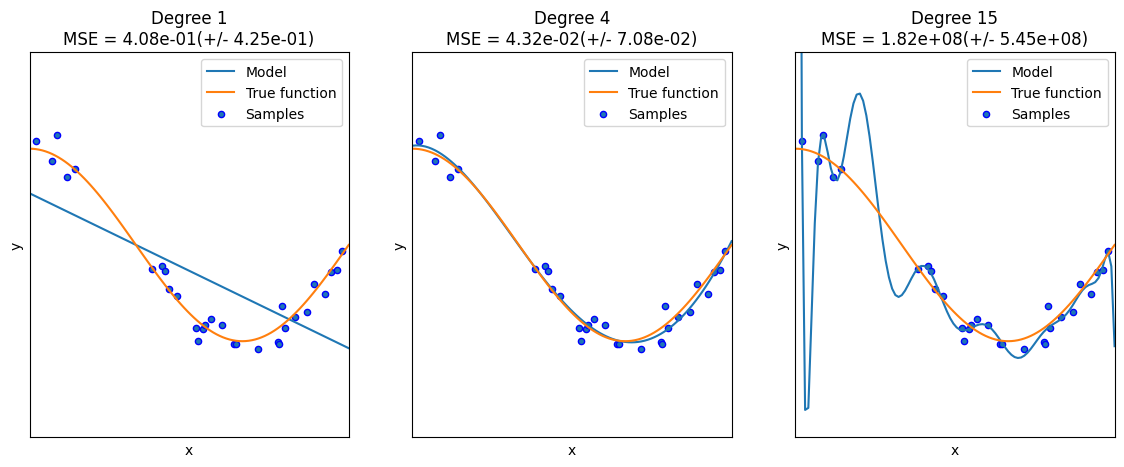

In [40]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, fn(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## <center>Self practice</center>

* Using steel industry energy consumption dataset from ([Link](https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption)) or `ml-regression.db`.
    1. Split the data to train and test set (80% training). Use [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    1. Train a multiple linear regression model that will predict the energy consumption `(Usage_kWh)`.
    1. Print the model `Mean Absolute Error`, `Mean Squared Error` and `Root Mean Squared Error`


* Select one indipendent and select `Usage_kWh` as dependent variable 
    1. Visualise the data (using `matplotlib`)
    1. Create a Polynomial Regression model using `[1,5,24]` as degrees
    1. Explain your observations in terms of Over-fitting, Under-fitting, Bias-Variance trade-offs.

* Write a brief explanation of the insights that you got from the datasets  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
from sqlalchemy import create_engine, text

session_engine = create_engine('sqlite:///ml-regression.db')
with session_engine.connect() as conn:
    steel_industry_df = pd.read_sql_query(text('SELECT * FROM Steel_industry_data'), conn)

steel_industry_df.drop(columns= 'index', inplace= True)

y = steel_industry_df['Usage_kWh']
steel_industry_df.drop(columns= 'Usage_kWh', inplace= True)
steel_industry_df.head()


,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00.000000,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00.000000,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00.000000,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00.000000,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00.000000,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [5]:
steel_industry_df["year"] = pd.to_datetime(steel_industry_df["date"]).dt.year
steel_industry_df["month"] = pd.to_datetime(steel_industry_df["date"]).dt.month
steel_industry_df["day_of_month"] = pd.to_datetime(steel_industry_df["date"]).dt.day

steel_industry_df["hour"] = pd.to_datetime(steel_industry_df["date"]).dt.hour
steel_industry_df["minute"] = pd.to_datetime(steel_industry_df["date"]).dt.minute
steel_industry_df["sec"] = pd.to_datetime(steel_industry_df["date"]).dt.second

In [6]:
steel_industry_df.head()

,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,year,month,day_of_month,hour,minute,sec
0,2018-01-01 00:15:00.000000,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,2018,1,1,0,15,0
1,2018-01-01 00:30:00.000000,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,2018,1,1,0,30,0
2,2018-01-01 00:45:00.000000,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,2018,1,1,0,45,0
3,2018-01-01 01:00:00.000000,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,2018,1,1,1,0,0
4,2018-01-01 01:15:00.000000,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,2018,1,1,1,15,0


In [7]:
Nunique = steel_industry_df.nunique()
cols_to_drop = Nunique[Nunique == 1].index
steel_industry_df.drop(columns= cols_to_drop, inplace= True)
steel_industry_df.drop(columns= 'date', inplace= True)

steel_industry_df.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,month,day_of_month,hour,minute
0,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1,1,0,15
1,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1,1,0,30
2,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1,1,0,45
3,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,1,1,0
4,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,1,1,15


In [9]:
from category_encoders import OneHotEncoder
# !pip install category-encoders

cat_feats = steel_industry_df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(cols=cat_feats, handle_unknown='ignore')

encoder.fit(steel_industry_df)
X = encoder.transform(steel_industry_df)

# X.dtypes

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficient : {regressor.coef_}")

y_pred = regressor.predict(X_test)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# eval_df

Model intercept : -6.655491947718545
Model coefficient : [ 2.95358090e-01  3.33040181e-02  1.68122798e+03  1.05496466e-01
  4.53803845e-02 -2.89473507e-06  4.49827780e-03 -4.49827789e-03
 -1.51067607e-01  4.51125733e-01 -6.36848245e-02 -1.58397605e-01
 -7.34774178e-02 -1.20818382e-01  1.16320104e-01 -1.08642210e+00
  7.03266449e-01  3.83155649e-01 -1.18118162e-01 -2.76820742e-02
  2.70767544e-05 -1.62465583e-03]


In [12]:
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error:  27.030755241603085
Root Mean Squared Error:  5.1991110049318126
Mean Absolute Error:  2.6400715296850565


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #to convert the original features into their higher order terms 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

* Select one independent and select `Usage_kWh` as dependent variable 
    1. Visualise the data (using `matplotlib`)
    1. Create a Polynomial Regression model using `[1,5,24]` as degrees
    1. Explain your observations in terms of Over-fitting, Under-fitting, Bias-Variance trade-offs.

* Write a brief explanation of the insights that you got from the datasets  

In [14]:
# y

In [50]:
x = steel_industry_df['Lagging_Current_Reactive.Power_kVarh']
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)


In [16]:
# x_test

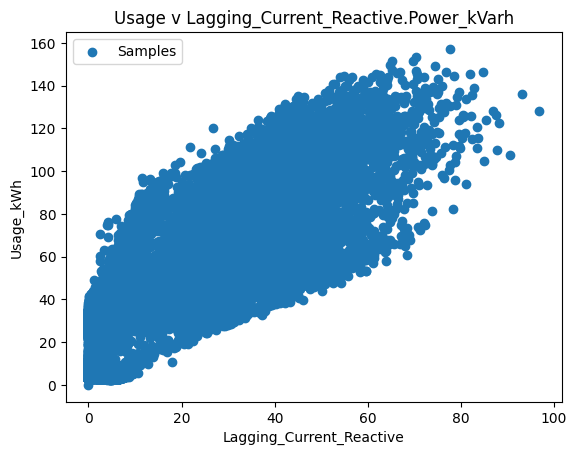

In [48]:
plt.scatter(x, y,label="Samples")
plt.title('Usage v Lagging_Current_Reactive.Power_kVarh')
plt.xlabel('Lagging_Current_Reactive')
plt.ylabel('Usage_kWh')
plt.legend(loc="best")
plt.show()

In [45]:
# x_test

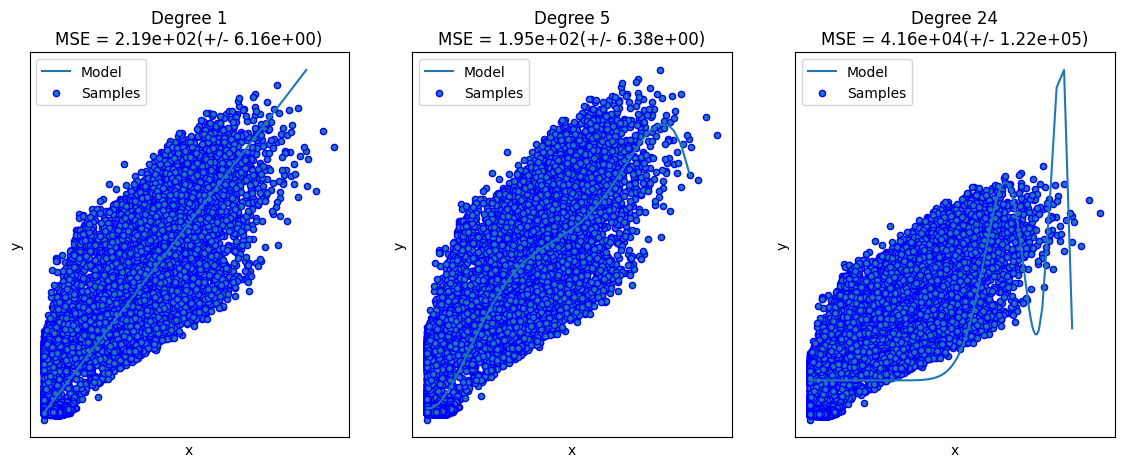

In [52]:
degrees = [1, 5, 24]

x_train = pd.DataFrame(x_train)
Y_train = pd.DataFrame(Y_train)
x_test = pd.DataFrame(x_test)
Y_test = pd.DataFrame(Y_test)

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         
                         ("linear_regression", linear_regression)])
    pipeline.fit(x_train, Y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, x_train, Y_train,
                             scoring="neg_mean_squared_error", cv=10)

    
    x_test = x_test.sort_values(by='Lagging_Current_Reactive.Power_kVarh')
    
    plt.plot(x_test, pipeline.predict(x_test), label="Model")
    # plt.plot(x_test, Y_test, label="True function")
    plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    # plt.xlim((0, 1))
    # plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()